# Pyber Ride Sharing Analysis
1. We can observe by analyzing the data that the total number of rides is considerably higher in urban areas(68%) when compared to rural (6.8%) or suburban areas(30.5%) 
2. Due to this higher demand of rides in the urban cities, the number of drivers is also considerably higher in urban areas (80.9%) when compared to rural(2.6%) or suburban areas (16.5%)
3. Based on previous observations we can see that the company's revenue comes mainly from urban areas (62.7%)
4. This analysis can help the company in making future business decisions. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load 
# Read the City and Ride Data
city_data_pd = pd.read_csv("data/city_data.csv")

ride_data_pd = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_pd, city_data_pd, on ="city", how="left")

In [2]:
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

<Figure size 41472x36288 with 0 Axes>

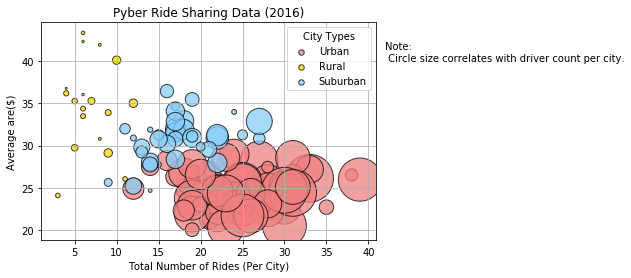

In [3]:
# Obtain the x and y coordinates for each of the three city types

# x axis for cities
urban_data = combined_data.loc[combined_data["type"] == "Urban", :]

city_u = urban_data.groupby(["city","type"])
city_type_u = city_u["city"].value_counts()
x_axis_u = city_type_u.tolist()

rural_data = combined_data.loc[combined_data["type"] == "Rural", :]

city_r = rural_data.groupby(["city","type"])
city_type_r = city_r["city"].value_counts()
x_axis_r = city_type_r.tolist()

suburban_data = combined_data.loc[combined_data["type"] == "Suburban", :]

city_s = suburban_data.groupby(["city","type"])
city_type_s = city_s["city"].value_counts()
x_axis_s = city_type_s.tolist()

#y axis and s for cities
city_mean_u = city_u["fare"].mean()
city_avg_u = city_mean_u.tolist()

driver_u = city_u["driver_count"].sum()
driver_count_t_u = driver_u.tolist()

city_mean_r = city_r["fare"].mean()
city_avg_r = city_mean_r.tolist()

driver_r = city_r["driver_count"].sum()
driver_count_t_r = driver_r.tolist()

city_mean_s = city_s["fare"].mean()
city_avg_s = city_mean_s.tolist()

driver_s = city_s["driver_count"].sum()
driver_count_t_s = driver_s.tolist()


# Build the scatter plots for each city types

fig = plt.figure(figsize=(576,504))
fig, ax = plt.subplots()

plt.scatter(x_axis_u , city_avg_u, marker="o", facecolor="lightcoral", edgecolors="black", s=driver_count_t_u, alpha=0.75, label ="Urban")
plt.scatter(x_axis_r , city_avg_r, marker="o", facecolor="gold", edgecolors="black", s=driver_count_t_r ,alpha=0.75, label = "Rural")
plt.scatter(x_axis_s , city_avg_s, marker="o", facecolor="lightskyblue", edgecolors="black", s=driver_count_t_s, alpha=0.75, label ="Suburban")


# Incorporate the other graph properties
ax.grid(True)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average are($)")

# Create a legend
lgnd = plt.legend(title="City Types", loc = "upper right",  markerscale = 0.4)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,40,"Note:\n Circle size correlates with driver count per city.")

# Save Figure

plt.savefig("Pyber Ride sharing Data 2016.png")


plt.show()

## Total Fares by City Type

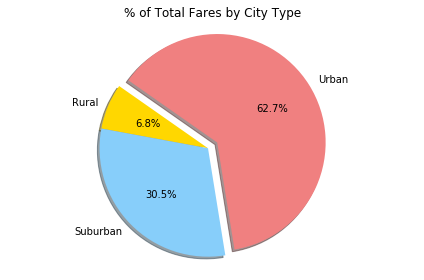

In [4]:
# Calculate Type Percents

city_ave = combined_data.groupby(["type"])

fare_ave = city_ave["fare"].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(fare_ave, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("% of Total Fares by City Type.png")

#Show Figure
plt.tight_layout()
plt.show()

## Total Rides by City Type

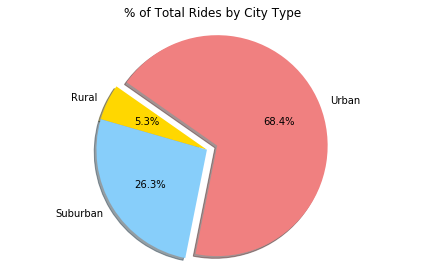

In [5]:
# Calculate Type Percents
city_ave = combined_data.groupby(["type"])

fare_ave = city_ave["driver_count"].count()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(fare_ave, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("% of Total Rides by City Type.png")

#Show Figure
plt.tight_layout()
plt.show()

## Total Drivers by City Type

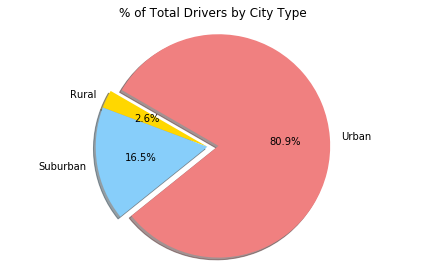

In [6]:
# Calculate Type Percents
city_ave = city_data_pd.groupby(["type"])
fare_ave = city_ave.sum()["driver_count"]

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(fare_ave, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png")

#Show Figure
plt.tight_layout()
plt.show()
